In [20]:
import pandas as pd 
import matplotlib.pyplot as plt

In [21]:
data1 = pd.read_csv('application_info.csv')
data2 = pd.read_csv('default_flg.csv')
data = pd.merge(data1, data2, on='id', how='inner') 

In [22]:
data

,id,application_dt,sample_cd,education_cd,gender_cd,age,car_own_flg,car_type_flg,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,Air_flg,default_flg
0,1,01JAN2014,train,SCH,M,27,Y,Y,0,0,-1.917831,0,40,2,3,32000,1,4,N,0
1,2,01JAN2014,train,GRD,F,26,N,N,0,0,-1.153144,2,60,2,3,50000,2,1,N,0
2,3,01JAN2014,train,SCH,M,35,N,N,0,1,-1.732810,0,40,1,2,20000,4,3,N,0
3,4,01JAN2014,train,GRD,F,35,N,N,0,1,-2.552133,2,20,2,3,80000,1,3,N,0
4,5,01JAN2014,train,UGR,F,24,N,N,0,0,-1.914581,1,50,2,3,27000,1,2,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180811,180812,31AUG2014,validate,GRD,F,60,Y,N,1,0,-2.341941,0,70,2,3,90000,1,3,Y,0
180812,180813,31AUG2014,validate,GRD,F,32,Y,Y,0,0,-1.237068,5,60,2,3,25000,2,3,N,1
180813,180814,31AUG2014,validate,SCH,M,26,Y,Y,0,0,-1.166505,3,60,2,3,35000,1,3,N,0
180814,180815,31AUG2014,validate,SCH,F,28,Y,N,0,0,-1.772115,3,50,2,3,23000,2,1,N,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180816 entries, 0 to 180815
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               180816 non-null  int64  
 1   application_dt   180816 non-null  object 
 2   sample_cd        180816 non-null  object 
 3   education_cd     180093 non-null  object 
 4   gender_cd        180816 non-null  object 
 5   age              180816 non-null  int64  
 6   car_own_flg      180816 non-null  object 
 7   car_type_flg     180816 non-null  object 
 8   appl_rej_cnt     180816 non-null  int64  
 9   good_work_flg    180816 non-null  int64  
 10  Score_bki        180816 non-null  float64
 11  out_request_cnt  180816 non-null  int64  
 12  region_rating    180816 non-null  int64  
 13  home_address_cd  180816 non-null  int64  
 14  work_address_cd  180816 non-null  int64  
 15  income           180816 non-null  int64  
 16  SNA              180816 non-null  int6

In [24]:
#id - Анонимизированный идентификатор заявителя
#application_dt - Дата подачи заявки
#sample_cd - Категория выборки
#education_cd - Образование
#gender_cd - Пол
#age - Возраст
#car_own_flg - Флаг наличия автомобиля
#car_type_flg - Флаг наличия иномарки
#appl_rej_cnt - Количество отказанных прошлых заявок
#good_work_flg - Флаг наличия "хорошей" работы
#Score_bki - Скор балл по данным из бюро кредитных историй
#out_request_cnt - Количество запросов в бюро
#region_rating - Рейтинг региона
#home_address_cd - Категоризатор домашнего адреса
#work_address_cd - Категоризатор рабочего адреса
#income - Доход заявителя
#SNA - Связь заявителя с клиентами
#first_time_cd - Давность наличия информации о заявителе
#Air_flg - Наличие загран паспорта
#default_flg - Флаг дефолта по кредиту

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder = LabelEncoder()
    
data['education_cd'] = label_encoder.fit_transform(data['education_cd'])

In [27]:
data['gender_cd'] = label_encoder.fit_transform(data['gender_cd'])
data['car_own_flg'] = label_encoder.fit_transform(data['car_own_flg'])
data['car_type_flg'] = label_encoder.fit_transform(data['car_type_flg'])
data['Air_flg'] = label_encoder.fit_transform(data['Air_flg'])

In [28]:
data = data[[ 'education_cd', 'gender_cd', 'age', 'car_own_flg',
       'car_type_flg',  'appl_rej_cnt', 'good_work_flg' , 'Score_bki' , 
        'out_request_cnt' , 'region_rating' , 'home_address_cd', 
        'work_address_cd' , 'income' , 'SNA',
        'first_time_cd' , 'Air_flg' , 'sample_cd' , 'default_flg' , 'id']]

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180816 entries, 0 to 180815
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   education_cd     180816 non-null  int32  
 1   gender_cd        180816 non-null  int32  
 2   age              180816 non-null  int64  
 3   car_own_flg      180816 non-null  int32  
 4   car_type_flg     180816 non-null  int32  
 5   appl_rej_cnt     180816 non-null  int64  
 6   good_work_flg    180816 non-null  int64  
 7   Score_bki        180816 non-null  float64
 8   out_request_cnt  180816 non-null  int64  
 9   region_rating    180816 non-null  int64  
 10  home_address_cd  180816 non-null  int64  
 11  work_address_cd  180816 non-null  int64  
 12  income           180816 non-null  int64  
 13  SNA              180816 non-null  int64  
 14  first_time_cd    180816 non-null  int64  
 15  Air_flg          180816 non-null  int32  
 16  sample_cd        180816 non-null  obje

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [31]:
train_data = data[data['sample_cd'] == 'train']
test_data = data[data['sample_cd'] == 'validate']

In [32]:
data['default_flg'].value_counts()

0    159982
1     20834
Name: default_flg, dtype: int64

In [33]:
train_data = train_data.drop(['sample_cd'] , axis =1 )
test_data = test_data.drop(['sample_cd'] , axis =1 )
train_data = train_data.drop(['id'] , axis =1 )
test_data = test_data.drop(['id'] , axis =1 )

In [34]:
X_train = train_data.drop(['default_flg'] , axis=1)
y_train = train_data['default_flg']
X_test = test_data.drop(['default_flg'] , axis=1)
y_test = test_data['default_flg']

In [35]:
X_train_small = small_train_data.drop(['default_flg'] , axis=1)
y_train_small = small_train_data['default_flg']
X_test_small = small_test_data.drop(['default_flg'] , axis=1)
y_test_small = small_test_data['default_flg']

NameError: name 'small_train_data' is not defined

In [36]:
rf = RandomForestClassifier(n_estimators=100 , random_state=42 , class_weight='balanced' , n_jobs = 2 )

In [37]:
rf.fit(X_train , y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=2, random_state=42)

In [38]:
y_pred = rf.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9006056489500198


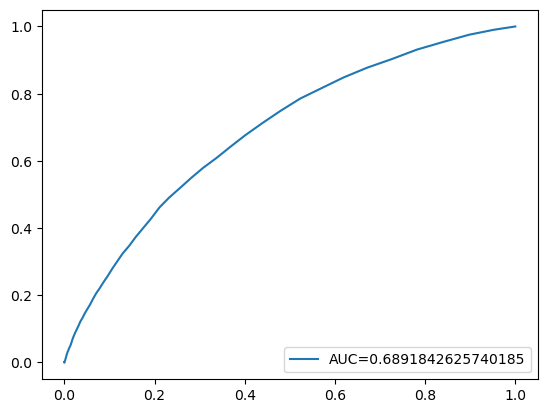

In [40]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

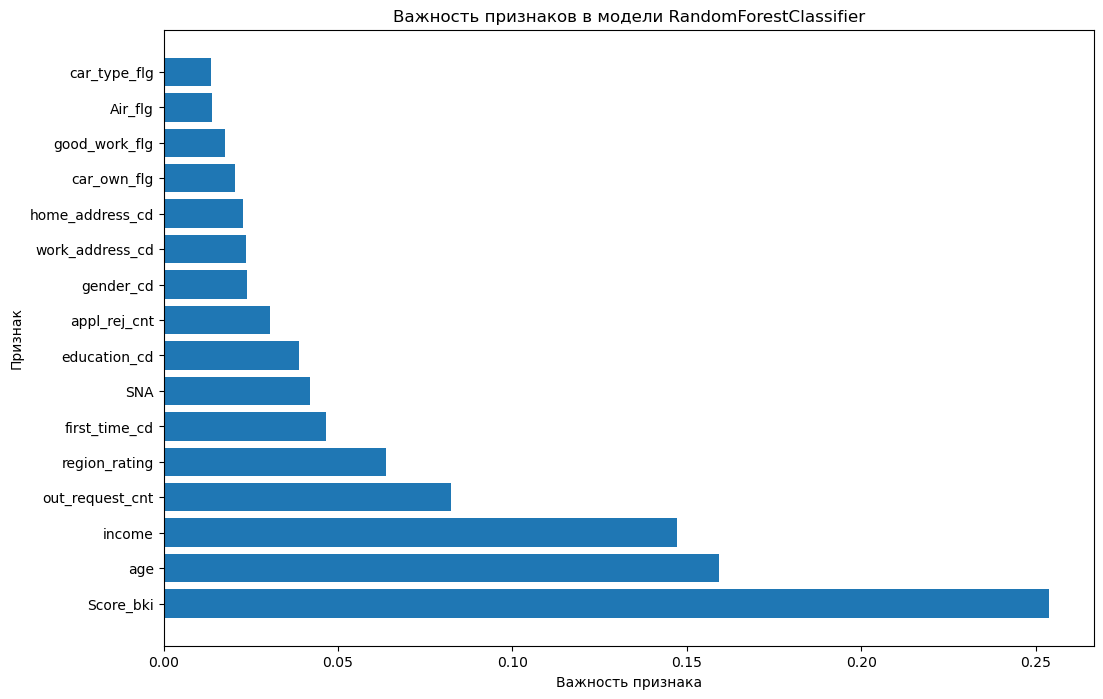

In [41]:
feature_importances = rf.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков в модели RandomForestClassifier')
plt.show()

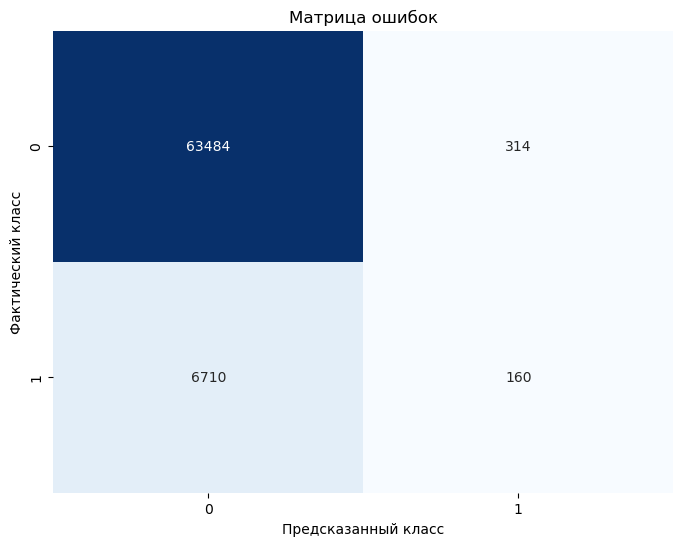

In [42]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
#70667
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Предсказанный класс')
plt.ylabel('Фактический класс')
plt.title('Матрица ошибок')
plt.show()

# Деплоинг

In [43]:
import pickle

In [44]:
pickle_out = open("random_forest_credit_scoring.pkl" , "wb")

In [45]:
pickle.dump(rf , pickle_out)

In [46]:
pickle_out.close()

In [55]:
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable


In [47]:
import streamlit as st

In [48]:
streamlit run

SyntaxError: invalid syntax (1135476472.py, line 1)

In [49]:
import streamlit as st

st.title('Мое первое Streamlit приложение')
st.write('Это очень простое приложение с использованием Streamlit.')

2023-10-03 14:34:37.077 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
